# # Introduzione ai classificatori

Nel seguente programma introduciamo i passi base della classificazione degli esempi di un dataset rappresentato come una matrice

Importiamo il package per l'apprendimento degli alberi

In [1]:
from sklearn import tree 

Definiamo la matrice con i dati (un esempio per riga)
e il vettore con il corrispondente valore della variabile target 

In [ ]:
# 6 esempi, 3 features per ogni esempio
# X sono le features
X = [[0, 0, 0], [1, 1, 1], [0, 1, 0], [0, 0, 1], [1, 1, 0], [1, 0, 1]]
# Y sono le etichette target
Y = [1, 0, 0, 0, 1, 1]

Dichiariamo il modello di classificazione che vogliamo usare e poi lo adattiamo (fit) ai dati

In [ ]:
clf = tree.DecisionTreeClassifier()
# Fittiamo il modello sui dati
clf = clf.fit(X, Y)

Prediciamo il valore della variabile target (e lo visualizziamo) per i dati passati, e usiamo il modello 'fittato' in clf

In [ ]:
# Diamo un nuovo esempio che non ha mai visto e vediamo quale classe predice
print(clf.predict([[0, 1, 1]]))

Visualizziamo l'albero appreso. 

---
Prima importiamo la libreria per la visualizzazione dei grafi (graphviz).
Poi esportiamo il classificatore in clf in una variabile che contiene la sua descrizione nel linguaggio dot.

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None)  
graph = graphviz.Source(dot_data)  
graph

Nel seguito usiamo il dataset Iris (dall'archivio dell'Università della California di Irvine (UCI) di Machine Learning)

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

# Dichiariamo il tipo del modello predittivo e i parametri dell'apprendimento dell'algoritmo di induzione del modello ad albero

In [ ]:
# Usa come criterio di split entropy
# Inizializza in maniera casuale il random state pari a 300 (per fare delle scelte di suddivisione di training e test set)
# min_samples minimo di numero dei campioni per foglia, se il valore scende sotto il minimo non faccio la foglia
# per evitare l'overfitting.
# Diamo i pesi da associare alle classi, diamo dei pesi unitari. Alla classe 0, diamo il peso 1. Alla classe 1, diamo il 
# peso 1 e così via.
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=5,class_weight={0:1,1:1,2:1})

# Dividiamo il dataset in training e test set

In [ ]:
# Generiamo una permutazione casuale degli indici degli esempiche verranno usati per il training e il test set
import numpy as np
np.random.seed(0)
# Prendiamo un vettore pari alla lunghezza del dataset (lunghezza iris è 150) ordinandoli in modo casuale
indices = np.random.permutation(len(iris.data))

# Decidiamo di tenere gli ultimi 10 indici per il test set, i rimanenti per il training set
indices_training=indices[:-10]
indices_test=indices[-10:]

# Componiamo le matrici dividendo training e test set con le relative classi target
iris_X_train = iris.data[indices_training] # teniamo per il training tutti gli elementi della  matrice tranne gli ultimi 10 
iris_y_train = iris.target[indices_training]
iris_X_test  = iris.data[indices_test] # teniamo da parte gli ultimi 10 elementi per il test set
iris_y_test  = iris.target[indices_test]

# Fittiamo il modello sul training set

In [ ]:
# fit the model to the training data
# Qua avviene il vero e proprio apprendimento
clf = clf.fit(iris_X_train, iris_y_train)

# Otteniamo le predizioni

In [ ]:
# Chiediamo di predire le classi del test set
# applichiamo il modello fittato in "clf" al test set 
predicted_y_test = clf.predict(iris_X_test)

# visualizziamo le predizioni (gli indici delle classi associati ai nomi delle classi in target_names)
print("Predictions:")
print(predicted_y_test)
print("True classes:")
print(iris_y_test) 
print(iris.target_names)

# Vediamo che c'è solo un errore sul secondo esempio

Visualizza l'indice delle instanze di test e le corrispondenti predizioni

In [ ]:
# print the corresponding instances indexes and class names 
for i in range(len(iris_y_test)): 
    print("Instance # "+str(indices_test[i])+": ")
    print("Predicted: "+iris.target_names[predicted_y_test[i]]+"\t True: "+iris.target_names[iris_y_test[i]]+"\n")

# Vediamo alcuni esempi

In [ ]:
for i in range(len(iris_y_test)): 
    print("Instance # "+str(indices_test[i])+": ")
    s=""
    for j in range(len(iris.feature_names)):
        s=s+iris.feature_names[j]+"="+str(iris_X_test[i][j])
        if (j<len(iris.feature_names)-1): s=s+", "
    print(s)
    print("Predicted: "+iris.target_names[predicted_y_test[i]]+"\t True: "+iris.target_names[iris_y_test[i]]+"\n")

# Otteniamo i risultati delle predizioni (model performance results)

In [ ]:
# print some metrics results
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
acc_score = accuracy_score(iris_y_test, predicted_y_test)
print("Accuracy score: "+ str(acc_score))

# Recall capacità di richiamare correttamente gli esempi
# f1 score è la media armonica e si moltiplica per due perchè sia recall che precision hanno lo stesso peso
f1=f1_score(iris_y_test, predicted_y_test, average='macro')
print("F1 score: "+str(f1))

# Usiamo la Cross Validation

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score # will be used to separate training and test
iris = load_iris()
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=5,class_weight={0:1,1:1,2:1})
clf = clf.fit(iris.data, iris.target)

# Gli passiamo il calssificatore che è stato fittato, la matrice dei dati, la matrice dei target
# cv le soglie di taglio, 5 cluster vector, ogni cluster 30 esempi perchè abbiamo 150 esempi.
scores = cross_val_score(clf, iris.data, iris.target, cv=5) # score will be the accuracy
print(scores)

In [ ]:
# computes F1- score
f1_scores = cross_val_score(clf, iris.data, iris.target, cv=5, scoring='f1_macro')
print(f1_scores)

# Mostriamo l'albero risultante 

## 1. Visualizza la figura dell'albero in un file PDF

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("my_iris_predictions")

## 2. Genera la figura

In [ ]:
print(list(iris.feature_names))
print(list(iris.target_names))

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names, 
                         class_names=iris.target_names, 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

# Le celle seguenti le creerete voi: ecco cosa dovete fare
Modificare questo Jupyter notebook sui decision trees sul dataset Iris e svolgete i seguenti compiti:

1. applicate un sovracampionamento (artificial inflation) ad una classe nel training set con un determinato fattore: 10 (si pesi di più una delle classi tra virginica o versicolor che sono più difficili da discriminare). Si apprenda l'albero di decisione in queste condizioni.
    - 1b. modifcare i pesi della stessa classe (si metta a 10 il peso per l'errata predizione ad esempio di Virginica in Versicolor o viceversa) e si apprenda  l'albero in queste condizioni. Dovreste ottenere risultati simili a quelli del punto 1.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score # will be used to separate training and test
iris = load_iris()
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=5,class_weight={0:1,1:1,2:10})
clf = clf.fit(iris.data, iris.target)

# Gli passiamo il calssificatore che è stato fittato, la matrice dei dati, la matrice dei target
# cv le soglie di taglio, 5 cluster vector, ogni cluster 30 esempi perchè abbiamo 150 esempi.
# cv quindi sono 5 fold.
scores = cross_val_score(clf, iris.data, iris.target, cv=5) # score will be the accuracy
print(scores)

# TODO Duplicare a mano gli esempi 

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score # will be used to separate training and test
iris = load_iris()
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=5,class_weight={0:1,1:10,2:1})
clf = clf.fit(iris.data, iris.target)

# Gli passiamo il calssificatore che è stato fittato, la matrice dei dati, la matrice dei target
# cv le soglie di taglio, 5 cluster vector, ogni cluster 30 esempi perchè abbiamo 150 esempi.
# cv quindi sono 5 fold.
scores = cross_val_score(clf, iris.data, iris.target, cv=5) # score will be the accuracy
print(scores)
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names, 
                         class_names=iris.target_names, 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

2. si apprendano gli alberi cercando di evitare l'overfitting (migliorando l'errore sul test set) facendo 'tuning' degli iper-parametri: il minimo numero dei campioni per foglia, la massima profondità dell'albero, i parametri di minomo decremento dell'impurezza, massimo numero dei nodi foglia, ecc.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score # will be used to separate training and test
iris = load_iris()
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=5,max_leaf_nodes=3,min_impurity_decrease=0.2,max_depth=2,class_weight={0:1,1:10,2:1})
clf = clf.fit(iris.data, iris.target)

# Gli passiamo il calssificatore che è stato fittato, la matrice dei dati, la matrice dei target
# cv le soglie di taglio, 5 cluster vector, ogni cluster 30 esempi perchè abbiamo 150 esempi.
# cv quindi sono 5 fold.
scores = cross_val_score(clf, iris.data, iris.target, cv=5) # score will be the accuracy
print(scores)
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names, 
                         class_names=iris.target_names, 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

# In questo modo si vede che in confronto a prima classifica molto meglio perchè versicolo non ha un sacco di nodi foglia,
# ma solo uno. Non ha senso splittare un nodo versicolor in altri nodi che comunque hanno target versicolor.

3. si costruisca la matrice di confusione dell'albero creato  sul test set e la si visualizzi. 

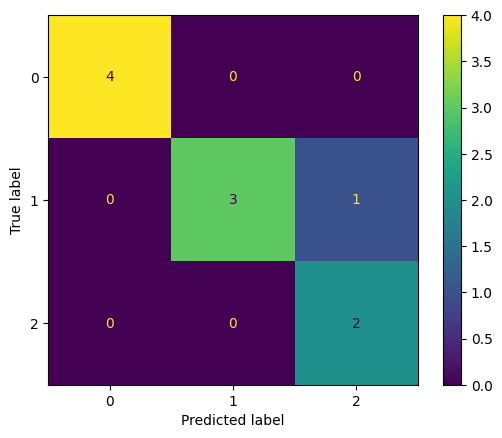

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
# Prendiamo un vettore pari alla lunghezza del dataset (lunghezza iris è 150) ordinandoli in modo casuale
indices = np.random.permutation(len(iris.data))

# Decidiamo di tenere gli ultimi 10 indici per il test set, i rimanenti per il training set
indices_training=indices[:-10]
indices_test=indices[-10:]

# Componiamo le matrici dividendo training e test set con le relative classi target
iris_X_train = iris.data[indices_training] # teniamo per il training tutti gli elementi della  matrice tranne gli ultimi 10 
iris_y_train = iris.target[indices_training]
iris_X_test  = iris.data[indices_test] # teniamo da parte gli ultimi 10 elementi per il test set
iris_y_test  = iris.target[indices_test]

# Fittiamo il modello
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=5,max_leaf_nodes=3,min_impurity_decrease=0.2,max_depth=2,class_weight={0:1,1:10,2:1})
clf = clf.fit(iris_X_train, iris_y_train)

# Predizioni sul test set
predicted_y_test = clf.predict(iris_X_test)

mc = confusion_matrix(iris_y_test, predicted_y_test)
mc

disp = ConfusionMatrixDisplay(confusion_matrix=mc,
                               display_labels=clf.classes_)

disp.plot()


4. si costruiscano le curve ROC (o curve nello spazio di coverage) e le si mostri per ciascun modello ad albero creato su un problema binario (con 1 sola classe positiva): per ciascun modello dovete costruire tre curve, una per ciascuna classe, considerata a turno la classe positiva. (scikit learn roc curve)

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score # will be used to separate training and test
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
iris = load_iris()
print(iris.target)
newTarget = iris.target
newTarget[newTarget == 2] = 1

iris.target = newTarget
print(iris.target)
iris.target_names = np.array(['setosa', 'not setosa'])

np.random.seed(0)
# Prendiamo un vettore pari alla lunghezza del dataset (lunghezza iris è 150) ordinandoli in modo casuale
indices = np.random.permutation(len(iris.data))

# Decidiamo di tenere gli ultimi 10 indici per il test set, i rimanenti per il training set
indices_training=indices[:-10]
indices_test=indices[-10:]

# Componiamo le matrici dividendo training e test set con le relative classi target
iris_X_train = iris.data[indices_training] # teniamo per il training tutti gli elementi della  matrice tranne gli ultimi 10 
iris_y_train = iris.target[indices_training]
iris_X_test  = iris.data[indices_test] # teniamo da parte gli ultimi 10 elementi per il test set
iris_y_test  = iris.target[indices_test]

# Fittiamo il modello
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=5,max_leaf_nodes=3,min_impurity_decrease=0.2,max_depth=2,class_weight={0:1,1:1})
clf = clf.fit(iris_X_train, iris_y_train)

metrics.RocCurveDisplay.from_estimator(
    clf, iris_X_test, iris_y_test)

In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score # will be used to separate training and test
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
iris = load_iris()
print(iris.target)
newTarget = iris.target
newTarget[newTarget == 1] = 0
newTarget[newTarget == 0] = 1
newTarget[newTarget == 2] = 1

iris.target = newTarget
print(iris.target)
iris.target_names = np.array(['versicol', 'not versicol'])

np.random.seed(0)
# Prendiamo un vettore pari alla lunghezza del dataset (lunghezza iris è 150) ordinandoli in modo casuale
indices = np.random.permutation(len(iris.data))

# Decidiamo di tenere gli ultimi 10 indici per il test set, i rimanenti per il training set
indices_training=indices[:-10]
indices_test=indices[-10:]

# Componiamo le matrici dividendo training e test set con le relative classi target
iris_X_train = iris.data[indices_training] # teniamo per il training tutti gli elementi della  matrice tranne gli ultimi 10 
iris_y_train = iris.target[indices_training]
iris_X_test  = iris.data[indices_test] # teniamo da parte gli ultimi 10 elementi per il test set
iris_y_test  = iris.target[indices_test]

# Fittiamo il modello
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=5,max_leaf_nodes=3,min_impurity_decrease=0.2,max_depth=2,class_weight={0:1,1:1})
clf = clf.fit(iris_X_train, iris_y_train)

metrics.RocCurveDisplay.from_estimator(
    clf, iris_X_test, iris_y_test)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


IndexError: index 1 is out of bounds for axis 0 with size 1